In [1]:
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import sys


train_dataset, train_info = tfds.load('mnist', split='train', with_info=True)
test_dataset, test_info = tfds.load('mnist', split='test', with_info=True)


train_df = tfds.as_dataframe(train_dataset.take(60000),train_info)
test_df = tfds.as_dataframe(test_dataset.take(10000),test_info)

tfds.show_examples(train_dataset, test_dataset)

In [2]:
x_train = train_df[["image"]]
y_train = train_df[["label"]]

x_test = test_df[["image"]]
y_test = test_df[["label"]]

#Changes array formatting
flattened_array = np.concatenate(np.concatenate(x_train.to_numpy()))
flattened_array_test = np.concatenate(np.concatenate(x_test.to_numpy()))

np.shape(flattened_array)
np.shape(flattened_array_test)

train_arr = np.concatenate(flattened_array).reshape(60000, 784)
test_arr = np.concatenate(flattened_array_test).reshape(10000, 784)

Is the distribution of digits equal in the original data set? Is there a bias?


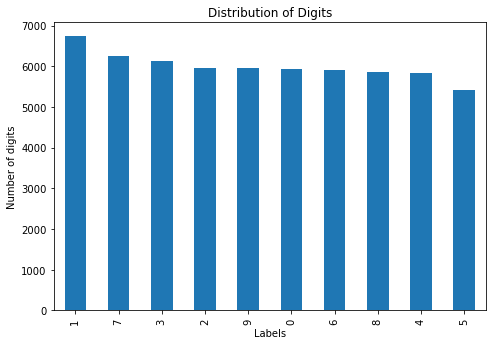

In [59]:
import matplotlib.pyplot as plt

print('Is the distribution of digits equal in the original data set? Is there a bias?')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Number of digits')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Digits')
numDigits = train_df['label'].value_counts()
numDigits.plot.bar()

In [5]:
# Fit k-nearest neighbors
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X=train_arr, y=y_train.to_numpy().ravel())

score = model.score(test_arr, y_test.to_numpy().ravel())
print("accuracy: %f" % (score))

accuracy: 0.968800


running example on the number 6


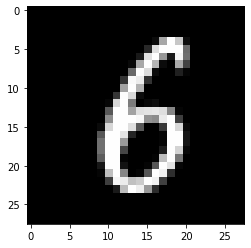

In [81]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

print("running example on the number", y_test.loc[7, "label"])
example_image = x_test.loc[7, "image"]

pixels = np.concatenate(example_image).reshape(28,28)
plt.imshow(pixels, cmap='gray')
plt.show()

(60000,) (60000,)
[4 1 0 ... 6 1 5]
[125.76565509 116.23252557 134.57711544 ... 111.83469945 117.07689781
 134.77017474]


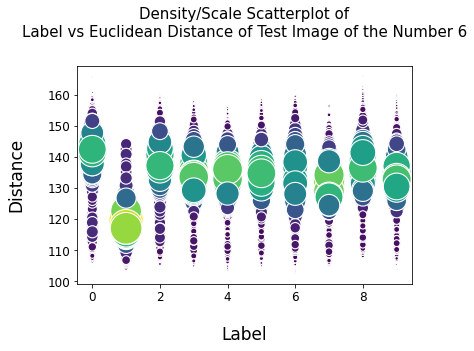

In [82]:
example_image = example_image.reshape(784)

dists = np.sqrt(((train_arr - example_image) ** 2).sum(axis=1))
np.shape(dists)
dists

# Calculate the point density
x_col = y_train.to_numpy().reshape(60000)
y_col = dists
xy = np.vstack([x_col,y_col])
z = gaussian_kde(xy)(xy)
# z = z[1:]
print(np.shape(y_col), np.shape(x_col))

# graph preparation
# plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=x_col, y=y_col, c=z, s=150000 * z)

# graph config
ax.set()
ax.set_title("Density/Scale Scatterplot of\nLabel vs Euclidean Distance of Test Image of the Number 6", size=15, pad=30)
ax.set_xlabel("Label", size=17, labelpad=22)
ax.set_ylabel("Distance", size=17, labelpad=22)
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12, rotation=0)
print(x_col)
print(y_col)

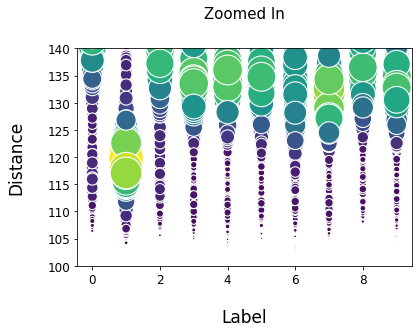

In [83]:
ax = sns.scatterplot(x=x_col, y=y_col, c=z, s=150000 * z)

ax.set()
ax.set_title("Zoomed In", size=15, pad=30)
ax.set_xlabel("Label", size=17, labelpad=22)
ax.set_ylabel("Distance", size=17, labelpad=22)
plt.ylim(100, 140)
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12, rotation=0)

Text(0.5, 1.0, 'The Closest 100 Neighbors to Test Image 6')

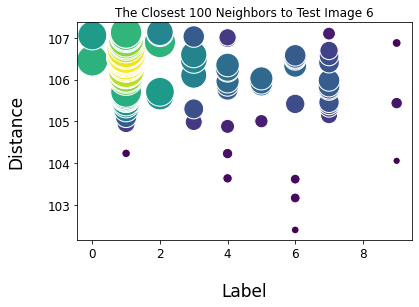

In [84]:
def getKey(item):
    return item[0]

data = np.array((y_col,x_col)).T
closest = np.array(sorted(data, key=getKey))[:100]
closest = closest.T

# Calculate the point density
x_col = closest[1]
y_col = closest[0]
xy = np.vstack([x_col,y_col])
z = gaussian_kde(xy)(xy)

ax = sns.scatterplot(x=x_col, y=y_col, c=z, s=15000 * z)

ax.set()
ax.set_title("Density/Scale Scatterplot of\nLabel vs Euclidean Distance of Test Image of the Number 0", size=15, pad=30)
ax.set_xlabel("Label", size=17, labelpad=22)
ax.set_ylabel("Distance", size=17, labelpad=22)
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12, rotation=0)

plt.xlabel("Label")
plt.ylabel("Distance")
plt.title("The Closest 100 Neighbors to Test Image 6")

In [56]:
from sklearn.neighbors import KNeighborsClassifier
        
kVals = np.arange(3,9,2)

for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k)
    
    model.fit(X=train_arr, y=y_train.to_numpy().ravel())
    
    # evaluate the model and update the accuracies list
    score = model.score(test_arr, y_test.to_numpy().ravel())
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))

k=3, accuracy=97.05%
k=5, accuracy=96.88%
k=7, accuracy=96.94%


In [58]:
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X=train_arr, y=y_train.to_numpy().ravel())
predictions = model.predict(test_arr)

print(classification_report(y_test.to_numpy().ravel(),predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [105]:
distances = []
for image in test_arr[:100]:
    distances.append(np.sqrt(((train_arr - image) ** 2).sum(axis=1)))

print(np.shape(distances))

(100, 60000)


In [173]:
labels = y_test[["label"]].to_numpy()[:100]
labels = labels.reshape(100)

dist_df = pd.DataFrame(distances,labels)

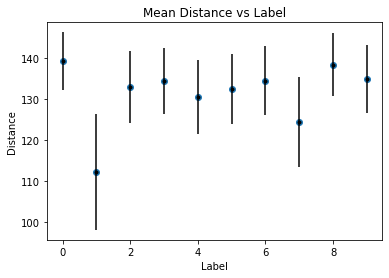

In [177]:
average = []
stdev = []
x = []

for i in range(0,10):
    average.append(dist_df.loc[i].mean().mean())
    stdev.append(dist_df.loc[i].mean().std())
    x.append(i)
    

plt.errorbar(x, average, yerr = stdev, fmt = '.k')
plt.scatter(x = x, y = average)
plt.xlabel("Label")
plt.ylabel("Distance")
plt.title("Mean Distance vs Label")
plt.show()